## Import necessary python modules

In [1]:
from streakimage import StreakImage

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import Data

### Load background

In [2]:
path_to_bg = "files/example_bg ST4 g20 20x556ms.img"
bg = StreakImage(path_to_bg)

### Load image

In [3]:
path_to_img = "files/example_streak-image ST4 g20 20x556ms.img"
image =  StreakImage(path_to_img, bg=bg)
image_raw =  StreakImage(path_to_img, bg=bg) # This image will not be corrected and can be used for comparison.

### Plot raw data

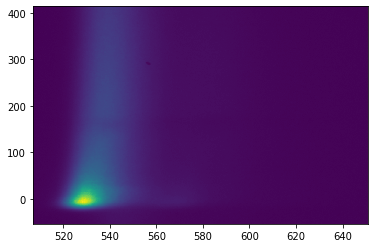

In [4]:
plt.pcolormesh(image.data.columns, image.data.index, image.data, shading='nearest')

Matplotlib supports a wide variety of [colormaps](https://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps). They can be explicitly set with the *cmap* argument. The colormap *jet* together with a logarithmic normalization of the colormap (*norm=mpl.colors.LogNorm()*) greatly enhances the visibility of small features.

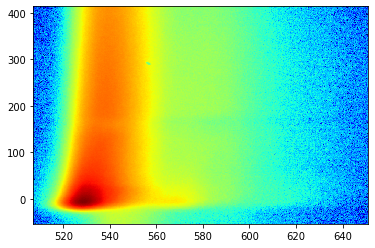

In [5]:
plt.pcolormesh(image.data.columns, image.data.index, image.data, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm())

A colorbar can be added as shown below.

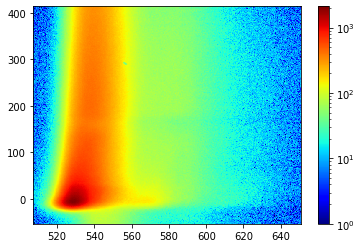

In [6]:
fig = plt.pcolormesh(image.data.columns, image.data.index, image.data, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm())
plt.colorbar(fig)

## Correct image stepwise

The image data is stored in a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Subsets of the data frame can be selected with the [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) functions.
While loc takes labels as indices as arguments, iloc takes absolut column position. The linked documentations list the different types of posslible arguments.
The syntax is loc\[time_from : time_to, wavelength_from : wavelength_to\] or iloc\[line_from : line_to, column_from : column_to\] 
respectively.
loc and iloc can be combined by chaning (see below). For more information refer to the linked documentations.

The manual offset is calculated from 'dark' area in the image.
This area has to be identified first. In the ST4 example the lower right corner (wl=620nm+,t<0) seems to be a good spot.
In most cases it's better to refer to lines than to time for the vertical dimension of this area. This is due to the fact that the time axis is shifted (to position the origin at the maximum of the pl) during import. Using time to define the offset area would lead to different sizes of that area.

The area can be adjusted until there is no significant variation of the intensity (besides the inevitable noise) that could result from an actual signal.

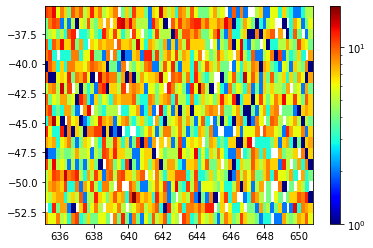

In [7]:
# definig variables vor better readability
wl_from = 635 
wl_to = None

time_from = None
time_to = None
line_from = None
line_to = 20


data_subset = image.data.loc[time_from:time_to,wl_from:wl_to].iloc[line_from:line_to] # note that most of these variables are just None an thus ignored
fig = plt.pcolormesh(data_subset.columns, data_subset.index, data_subset, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm())
plt.colorbar(fig)

When the offset are is selected the offset can be calculated and subtractet from the image.

In [8]:
offset = data_subset.mean().mean()
offset

5.546428571428572

In [9]:
image.data-=offset

Recalculating and plotting the data_subset clearly shows the impact of the offset subtraction 

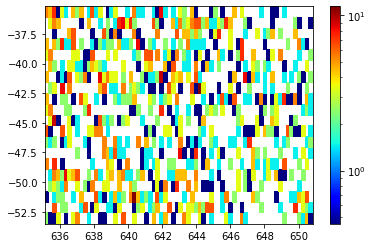

In [10]:
data_subset = image.data.loc[time_from:time_to,wl_from:wl_to].iloc[line_from:line_to]
fig = plt.pcolormesh(data_subset.columns, data_subset.index, data_subset, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm())
plt.colorbar(fig)

Looking at the image as a whole the impact is much more subtle.

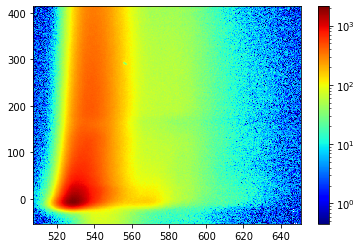

In [11]:
fig = plt.pcolormesh(image.data.columns, image.data.index, image.data, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm())
plt.colorbar(fig)

To highlight the effect one can set an upper limit for the color scale (vmax) and compare the corrected image to the uncorrected one.

Text(0.5, 1.0, 'uncorrected image')

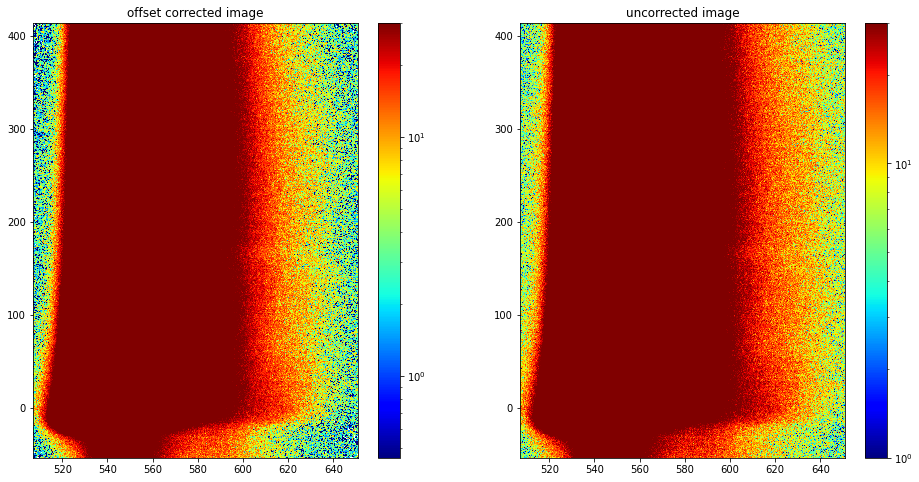

In [12]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

vmax=30

hm_corr = axes[0].pcolormesh(image.data.columns, image.data.index, image.data, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm(vmax=vmax))
fig.colorbar(hm_corr, ax=axes[0])
axes[0].set_title("offset corrected image")
hm_raw = axes[1].pcolormesh(image_raw.data.columns, image_raw.data.index, image_raw.data, shading='nearest', cmap='jet', norm=mpl.colors.LogNorm(vmax=vmax))
fig.colorbar(hm_raw, ax=axes[1])
axes[1].set_title("uncorrected image")

WIP

In [13]:
image.apply_gain_correction()

WIP

In [14]:
image.apply_int_correction()

WIP

In [15]:
image.apply_camera_correction()